<a href="https://colab.research.google.com/github/Aanandrai/Aanandrai/blob/main/Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [2]:
df =pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [ ]:
#steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the value
# 3. Train test split
# 4. train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
#preprocssing by removing a column

In [6]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
import matplotlib.pyplot as plt

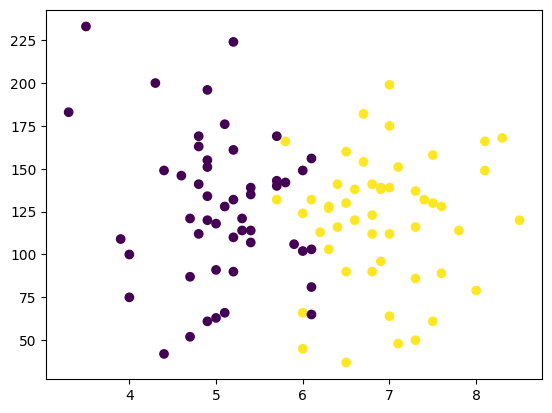

In [9]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
#extract input and output column

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [14]:
x.shape

(100, 2)

In [15]:
y.shape

(100,)

In [ ]:
#train test split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

In [18]:
x_train

,cgpa,iq
65,8.1,166.0
83,7.5,130.0
37,8.1,149.0
48,6.6,138.0
75,4.8,169.0
...,...,...
93,6.8,112.0
55,7.8,114.0
94,4.7,52.0
56,6.1,65.0


In [19]:
x_test

,cgpa,iq
86,5.1,128.0
52,7.0,175.0
96,4.4,42.0
67,5.0,118.0
50,3.5,233.0
77,7.3,50.0
95,4.3,200.0
25,5.0,91.0
42,7.6,89.0
29,7.0,112.0


In [ ]:
#scale the value

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_train

array([[ 1.88207586,  1.14817164],
       [ 1.33596035,  0.17432973],
       [ 1.88207586,  0.68830185],
       [ 0.51678709,  0.39073904],
       [-1.12155945,  1.22932513],
       [ 0.60780634,  0.82355767],
       [ 1.15392185, -0.20438657],
       [-0.02932843, -2.12501924],
       [-0.84850169,  1.41868328],
       [-0.30238618,  0.44484137],
       [ 0.06169083, -1.15117732],
       [-1.30359795,  0.60714835],
       [-0.75748244,  0.22843205],
       [-0.02932843,  0.68830185],
       [-0.30238618,  0.22843205],
       [-0.57544394, -0.2584889 ],
       [ 0.69882559, -0.01502842],
       [ 0.24372933,  0.1202274 ],
       [ 0.97188334,  0.74240417],
       [ 0.69882559, -0.90771685],
       [-2.48684822,  1.60804143],
       [-1.84971346, -1.31348431],
       [ 0.06169083, -0.55605171],
       [ 0.24372933,  0.09317623],
       [ 0.88086409, -1.61104712],
       [ 0.69882559,  0.47189253],
       [-0.66646319, -0.2584889 ],
       [-0.84850169, -1.55694479],
       [-0.57544394,

In [24]:
x_test=scaler.transform(x_test)

In [26]:
x_test

array([[-0.84850169,  0.1202274 ],
       [ 0.88086409,  1.39163212],
       [-1.48563645, -2.20617273],
       [-0.93952094, -0.15028425],
       [-2.30480972,  2.96059964],
       [ 1.15392185, -1.98976342],
       [-1.57665571,  2.06791122],
       [-0.93952094, -0.88066568],
       [ 1.4269796 , -0.93476801],
       [ 0.88086409, -0.31259123]])

In [ ]:
#train the model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf=LogisticRegression()

In [31]:
clf.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred=clf.predict(x_test)

In [33]:
y_test

,placement
86,0
52,1
96,0
67,0
50,0
77,1
95,0
25,0
42,1
29,1


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,y_pred)

1.0

In [37]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

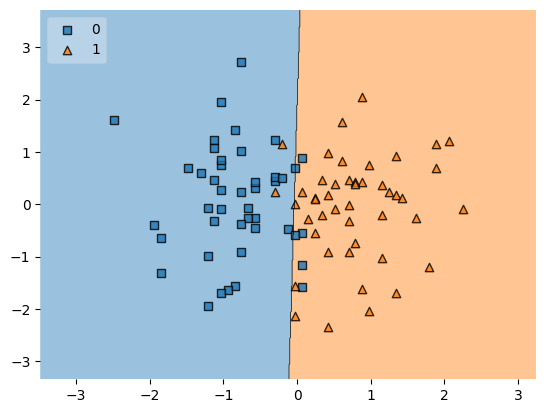

In [38]:
plot_decision_regions(x_train,y_train.values,clf=clf , legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))